<a href="https://colab.research.google.com/github/Raksantos/A.I-Studying/blob/master/Machine_Learning_Lidando_com_dados_de_muitas_dimens%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

resultado = pd.read_csv('exames.csv')

resultado.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [ ]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123143
random.seed(SEED)

valores_exames = resultado.drop(columns = ['id', 'diagnostico'])
diagnostico = resultado['diagnostico']

train_x, train_y, test_x, test_y = train_test_split(valores_exames, diagnostico)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100)

model.fit(train_x, train_y)#dá errado por causa dos valores vazios na tabela

ValueError: ignored

#Limpando as colunas com dados vazios

In [ ]:
resultado.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [ ]:
valores_exames_v1 = resultado.drop(columns = ['exame_33'])
valores_exames_v1.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678


In [ ]:
from sklearn.model_selection import train_test_split
from numpy import random
from sklearn.ensemble import RandomForestClassifier
import numpy as np

SEED = 123143
np.random.seed(SEED)

valores_exames = valores_exames_v1.drop(columns = ['id', 'diagnostico'])
diagnostico = valores_exames_v1['diagnostico']

train_x, test_x, train_y, test_y = train_test_split(valores_exames, diagnostico, test_size = 0.3)

model = RandomForestClassifier(n_estimators = 100)
model.fit(train_x, train_y)

print("A acurácia de random forest foi %.2f" % (model.score(test_x, test_y) * 100))

A acurácia de random forest foi 92.40


In [ ]:
from sklearn.dummy import DummyClassifier

dummy_model = DummyClassifier(strategy = "most_frequent")
dummy_model.fit(train_x, train_y)

print("A acurácia do Dummy Classifier foi %.2f" % (dummy_model.score(test_x, test_y) * 100))

A acurácia do Dummy Classifier foi 66.67


#Aula 2

In [ ]:
valores_exames_v1

dados_plot = valores_exames_v1.drop(columns = ['id']).iloc[:,0:10]

dados_plot = pd.melt(dados_plot, id_vars="diagnostico", var_name="exames", value_name="valores")
dados_plot.head()

,diagnostico,exames,valores
0,M,exame_1,17.99
1,M,exame_1,20.57
2,M,exame_1,19.69
3,M,exame_1,11.42
4,M,exame_1,20.29


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

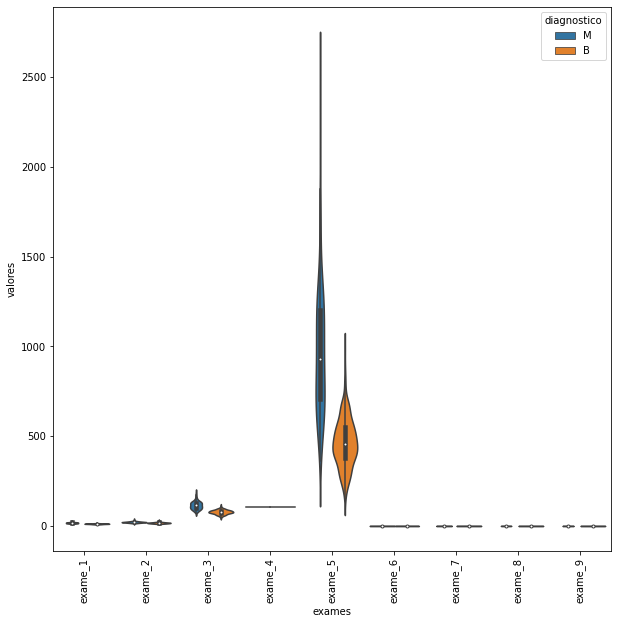

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.violinplot(data=dados_plot, x = "exames", y = "valores", hue="diagnostico")
plt.xticks(rotation = 90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

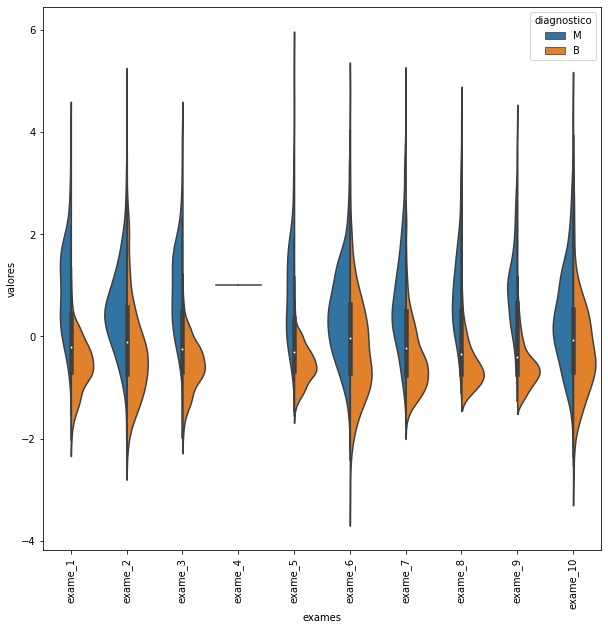

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
valores_exames_v1 = valores_exames_v1.drop(columns = ['diagnostico'])
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)

valores_exames_v2 = pd.DataFrame(data = valores_exames_v2, columns = valores_exames_v1.keys())

##repetição do código a cima
dados_plot = pd.concat([diagnostico, valores_exames_v2.drop(columns = ['id']).iloc[:,0:10]], axis=1)

dados_plot = pd.melt(dados_plot, id_vars="diagnostico", var_name="exames", value_name="valores")
dados_plot.head()

plt.figure(figsize=(10, 10))
sns.violinplot(data=dados_plot, x = "exames", y = "valores", hue="diagnostico", split=True)
plt.xticks(rotation = 90)


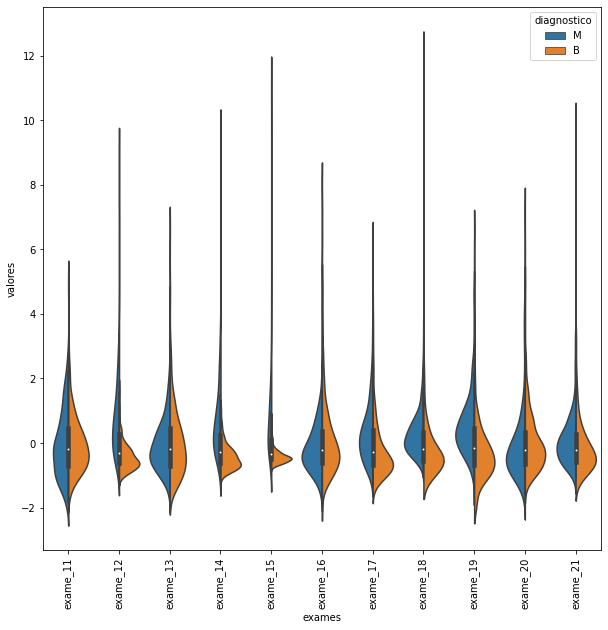

In [ ]:
def grafico_violino(valores, inicio, fim):
  dados_plot = pd.concat([diagnostico, valores.drop(columns = ['id']).iloc[:,inicio:fim]], axis=1)

  dados_plot = pd.melt(dados_plot, id_vars="diagnostico", var_name="exames", value_name="valores")
  dados_plot.head()

  plt.figure(figsize=(10, 10))
  sns.violinplot(data=dados_plot, x = "exames", y = "valores", hue="diagnostico", split=True)
  plt.xticks(rotation = 90)

grafico_violino(valores_exames_v2, 10, 21)

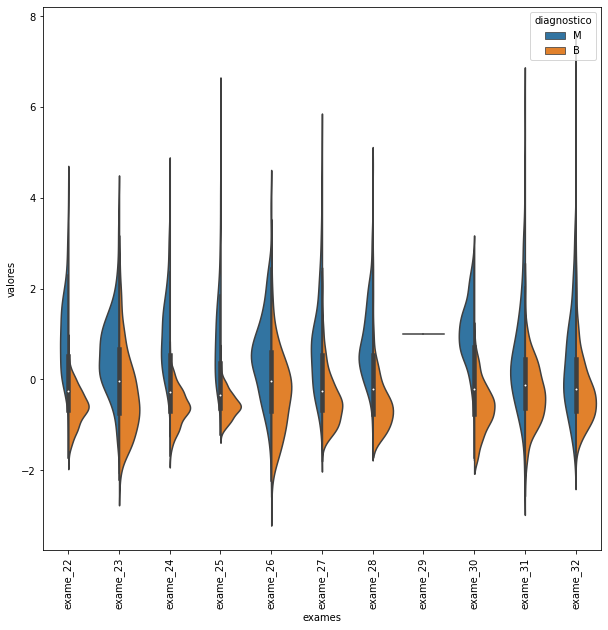

In [ ]:
grafico_violino(valores_exames_v2, 21, 32)

In [ ]:
valores_exames_v3 = valores_exames_v2.drop(columns = ['exame_29', 'exame_4'])

def classificar(valores):
  train_x, test_x, train_y, test_y = train_test_split(valores, diagnostico, test_size=0.3)

  classificador = RandomForestClassifier(n_estimators=100)
  classificador.fit(train_x, train_y)

  print("A acurácia do classificador foi %.2f" % (classificador.score(test_x, test_y) * 100))
  return (classificador.score(test_x, test_y) * 100)

In [ ]:
classificar(valores_exames_v3)

A acurácia do classificador foi 94.74


94.73684210526315

In [ ]:
valores_exames_v3 = valores_exames_v3.drop(columns = ['id'])
matriz_correlacao = valores_exames_v3.corr()
matriz_correlacao

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
exame_2,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
exame_3,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
exame_5,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
exame_6,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
exame_7,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
exame_8,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
exame_9,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
exame_10,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
exame_11,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


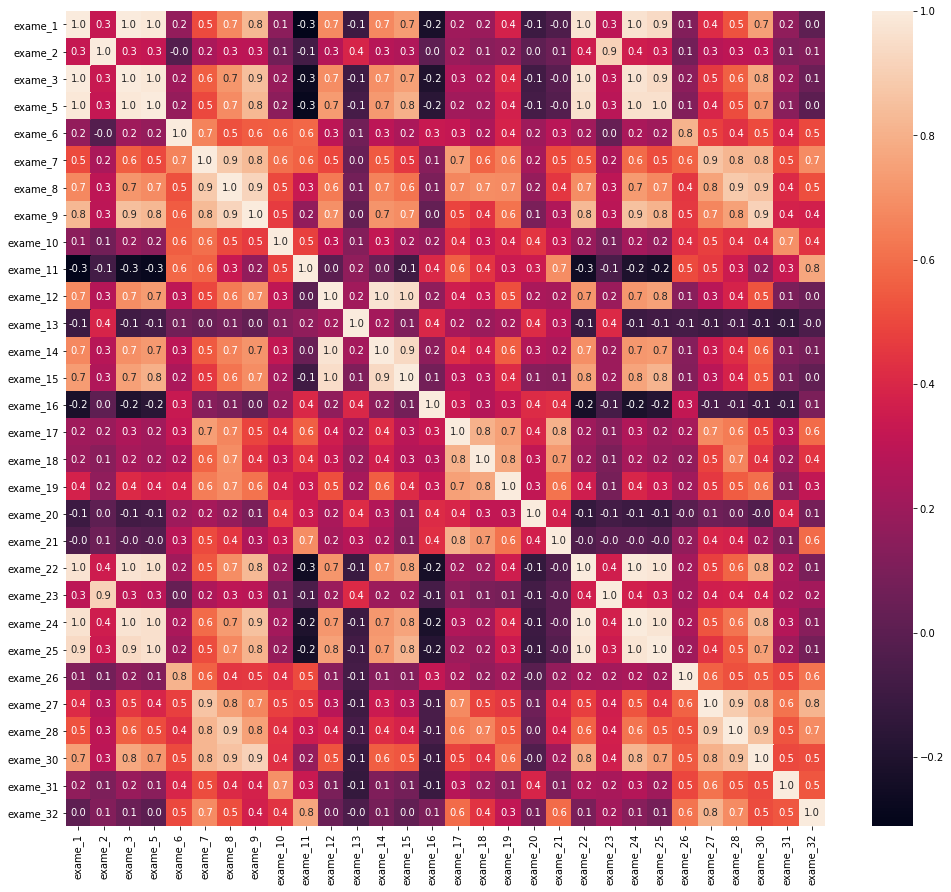

In [ ]:
plt.figure(figsize=(17, 15))
sns.heatmap(matriz_correlacao, annot = True, fmt = ".1f")

In [ ]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao > 0.99]

In [ ]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [ ]:
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2 > 1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [ ]:
valores_exames_v4 = valores_exames_v3.drop(columns = variaveis_correlacionadas.keys())

In [ ]:
classificar(valores_exames_v4)

A acurácia do classificador foi 97.08


97.07602339181285

In [ ]:
valores_exames_v5 = valores_exames_v3.drop(columns = ["exame_3", "exame_24"])
classificar(valores_exames_v5)

A acurácia do classificador foi 97.08


97.07602339181285

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selecionar_kmelhores = SelectKBest(chi2, k = 5)
selecionar_kmelhores

SelectKBest(k=5, score_func=<function chi2 at 0x7fa0e3a8b170>)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(valores_exames_v5, diagnostico, test_size = 0.3)

selecionar_kmelhores.fit(train_x, train_y)#chi2 não aceita valores negativos

ValueError: ignored

In [ ]:
SEED = 1234
np.random.seed(SEED)

valores_exames_v6 = valores_exames_v1.drop(columns=['exame_4', 'exame_29', 'exame_3', 'exame_24'])

train_x, test_x, train_y, test_y = train_test_split(valores_exames_v6, diagnostico, test_size = 0.3)

selecionar_kmelhores.fit(train_x, train_y)#chi2 não aceita valores negativos
treino_kbest = selecionar_kmelhores.transform(train_x)
teste_kbest = selecionar_kmelhores.transform(test_x)

In [ ]:
modelo = RandomForestClassifier(n_estimators=100, random_state=1234)
modelo.fit(treino_kbest, train_y)

print("A acurácia foi %.2f" % (modelo.score(teste_kbest, test_y) * 100))

A acurácia foi 92.98


In [ ]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(test_y, modelo.predict(teste_kbest))

[Text(56.5, 0.5, 'Real'), Text(0.5, 38.5, 'Predição')]

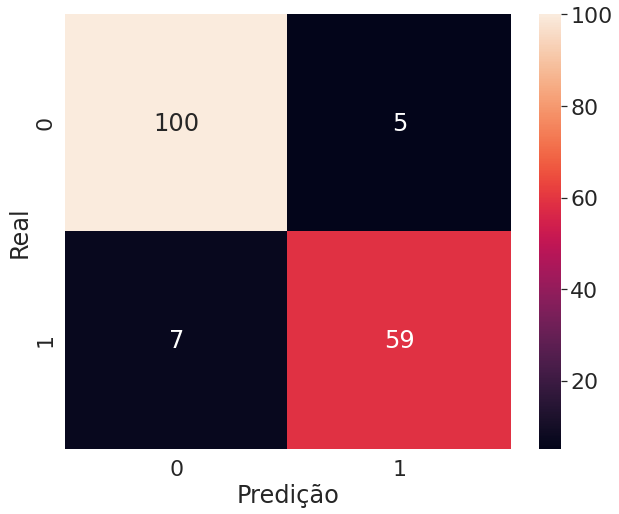

In [ ]:
plt.figure(figsize = (10, 8))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

In [ ]:
from sklearn.feature_selection import RFE

SEED = 1234
np.random.seed(SEED)

valores_exames_v6 = valores_exames_v1.drop(columns=['exame_4', 'exame_29', 'exame_3', 'exame_24'])

train_x, test_x, train_y, test_y = train_test_split(valores_exames_v6, diagnostico, test_size = 0.3)

selecionar_kmelhores.fit(train_x, train_y)#chi2 não aceita valores negativos
treino_kbest = selecionar_kmelhores.transform(train_x)
teste_kbest = selecionar_kmelhores.transform(test_x)

modelo = RandomForestClassifier(n_estimators=100, random_state=1234)
modelo.fit(train_x, train_y)

selecionar_rfe = RFE(estimator = modelo, n_features_to_select = 2, step = 1)
selecionar_rfe.fit(train_x, train_y)
treino_rfe = selecionar_rfe.transform(train_x)
teste_rfe = selecionar_rfe.transform(test_x)

modelo.fit(treino_rfe, train_y)

print("Resultado da classificação %.2f" % (modelo.score(teste_rfe, test_y)*100))

Resultado da classificação 87.13


[Text(56.5, 0.5, 'Real'), Text(0.5, 38.5, 'Predição')]

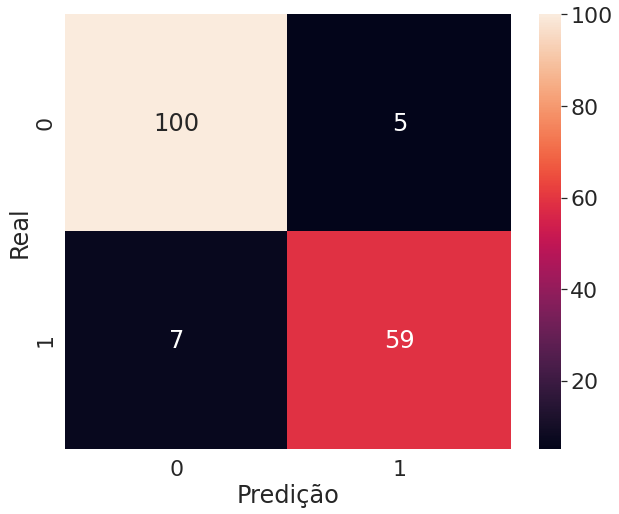

In [ ]:
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

Resultado da classificação 90.06


[Text(56.5, 0.5, 'Real'), Text(0.5, 38.5, 'Predição')]

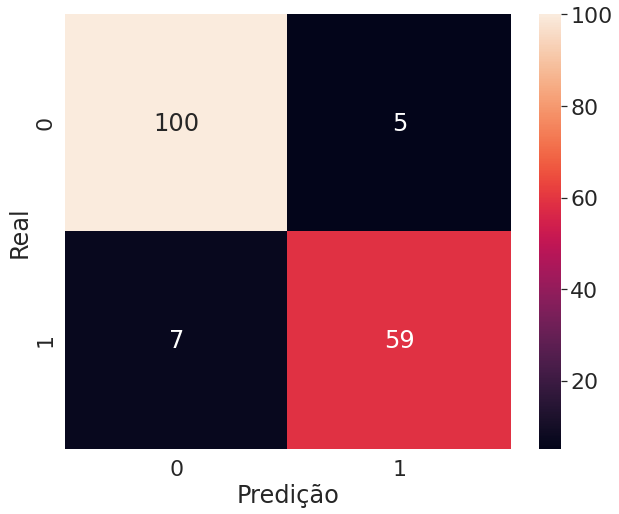

In [ ]:
 from sklearn.feature_selection import RFECV

SEED = 1234
np.random.seed(SEED)

valores_exames_v6 = valores_exames_v1.drop(columns=['exame_4', 'exame_29', 'exame_3', 'exame_24'])

train_x, test_x, train_y, test_y = train_test_split(valores_exames_v6, diagnostico, test_size = 0.3)

selecionar_kmelhores.fit(train_x, train_y)#chi2 não aceita valores negativos
treino_kbest = selecionar_kmelhores.transform(train_x)
teste_kbest = selecionar_kmelhores.transform(test_x)

modelo = RandomForestClassifier(n_estimators=100, random_state=1234)
modelo.fit(train_x, train_y)

selecionar_rfecv = RFECV(estimator = modelo, cv = 2, step = 1, scoring = "accuracy")
selecionar_rfecv.fit(train_x, train_y)
treino_rfecv = selecionar_rfe.transform(train_x)
teste_rfecv = selecionar_rfe.transform(test_x)

modelo.fit(treino_rfecv, train_y)

print("Resultado da classificação %.2f" % (modelo.score(teste_rfecv, test_y)*100))

plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

In [ ]:
train_x.columns[selecionar_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_14', 'exame_15', 'exame_22', 'exame_23', 'exame_25',
       'exame_26', 'exame_27', 'exame_28', 'exame_30', 'exame_31', 'exame_32'],
      dtype='object')

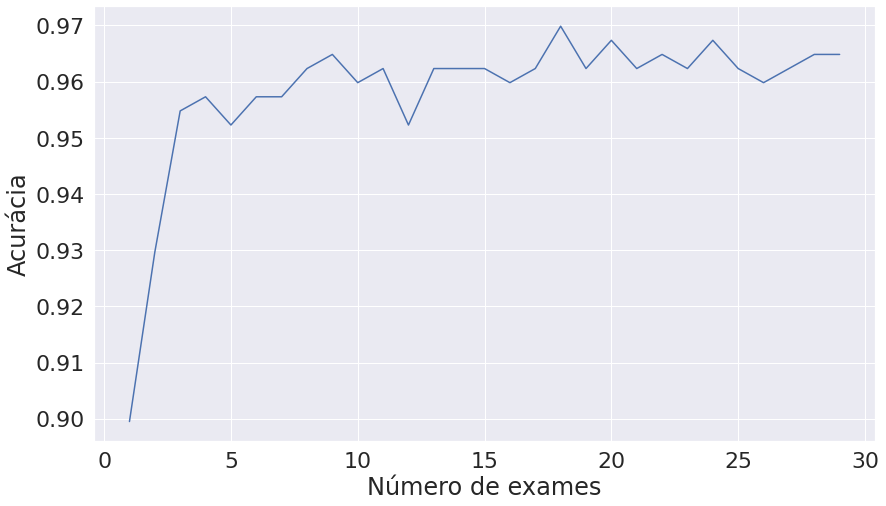

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (14, 8))
plt.xlabel("Número de exames")
plt.ylabel("Acurácia")
plt.plot(range(1, len(selecionar_rfecv.grid_scores_) + 1), selecionar_rfecv.grid_scores_)
plt.show()

In [ ]:
valores_exames_v7 = selecionar_rfe.transform(valores_exames_v6)
valores_exames_v7.shape

(569, 2)

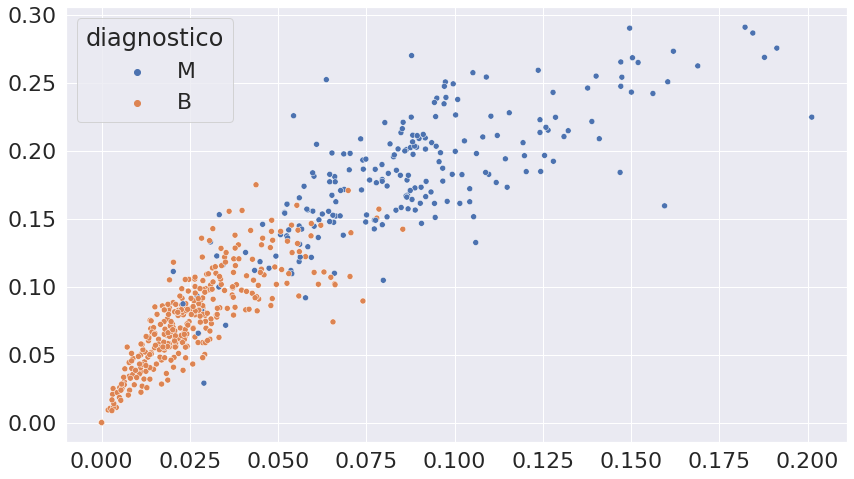

In [ ]:
import seaborn as sns

plt.figure(figsize = (14, 8))
sns.scatterplot(x = valores_exames_v7[:,0], y = valores_exames_v7[:,1], hue = diagnostico)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
valores_exames_v8 = pca.fit_transform(valores_exames_v5)
valores_exames_v8

array([[ 8.96150504,  1.20129074],
       [ 1.44812702, -3.54148885],
       [ 5.24751143, -1.46792042],
       ...,
       [ 0.87829285, -1.93369918],
       [10.0242535 ,  0.84654838],
       [-5.04091294, -0.5352433 ]])

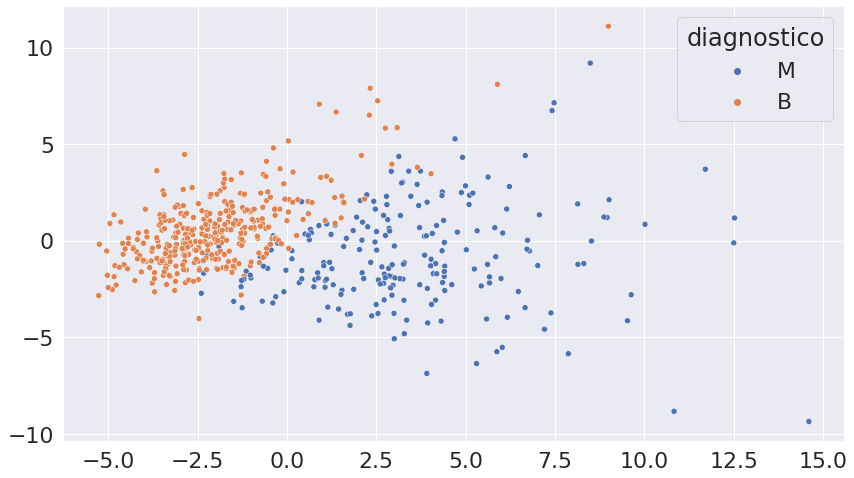

In [ ]:
import seaborn as sns

plt.figure(figsize = (14, 8))
sns.scatterplot(x = valores_exames_v8[:,0], y = valores_exames_v8[:,1], hue = diagnostico)

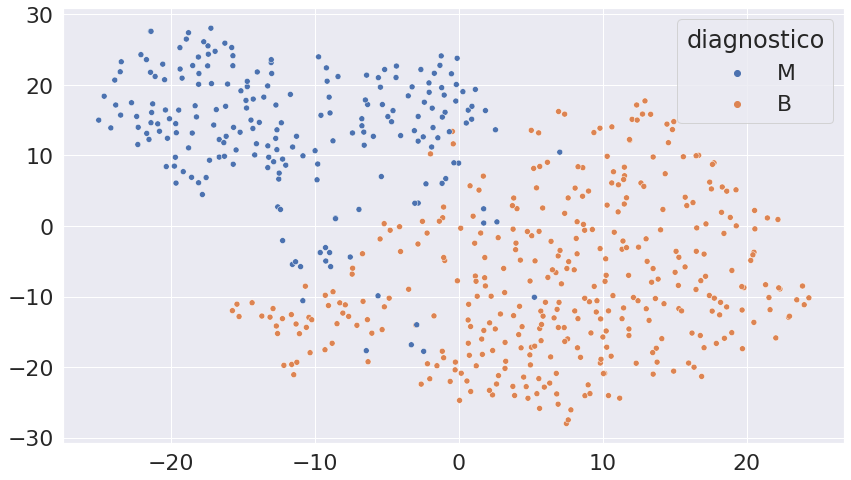

In [ ]:
 from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
valores_exames_v9 = tsne.fit_transform(valores_exames_v5)
plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v9[:,0], y = valores_exames_v9[:,1], hue = diagnostico)